In [26]:
from src.model.pre_trained import load_model
from src.utils.path import T1_ALL_IMAGE_PATH
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = load_model()

Loading model... 

2023-02-18 17:00:41.067822: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-18 17:00:41.069711: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/home/shubham/miniconda3/envs/tf/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Done


In [3]:
from skimage import io

In [5]:
image = io.imread(T1_ALL_IMAGE_PATH[0])

In [6]:
image

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 1, 1],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [10]:
image = tf.io.read_file(T1_ALL_IMAGE_PATH[0])
image = tf.image.decode_png(image, channels=1)
image = tf.image.resize_with_crop_or_pad(image, 256, 256)

In [13]:
image = tf.cast(image, tf.float32) / 127.5 - 1

In [15]:
image.shape

TensorShape([256, 256, 1])

In [16]:
image = tf.expand_dims(image, axis=0)

In [17]:
image.shape

TensorShape([1, 256, 256, 1])

In [18]:
t2 = model.predict(image)

1/1 [==============================] - 1s 668ms/step


In [20]:
t2 = t2 * 127.5 + 127.5

In [21]:
t2 = tf.squeeze(t2, axis=0)

In [22]:
t2 = t2.numpy()

In [25]:
image = tf.squeeze(image, axis=0)
image = image * 127.5 + 127.5
image = image.numpy()

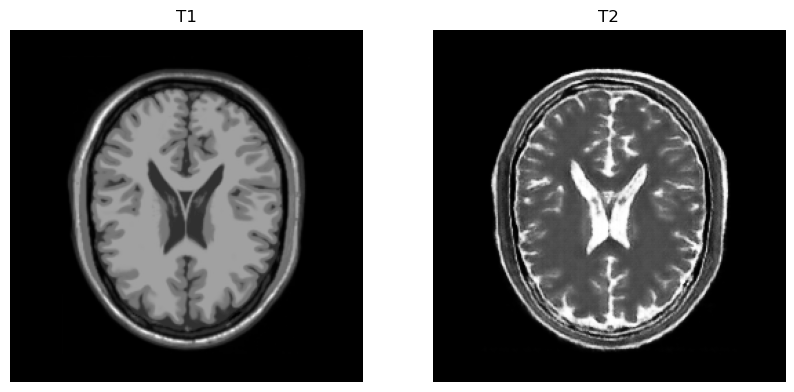

In [27]:
# plot two images
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('T1')
ax[0].axis('off')
ax[1].imshow(t2, cmap='gray')
ax[1].set_title('T2')
ax[1].axis('off')
plt.show()